<a href="https://colab.research.google.com/github/avinashdhakne/Communication-Buddy/blob/main/speech_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download the dataset**

In [ ]:
!pip install kaggle
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset"

In [ ]:
os.chdir("/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset")

In [ ]:
# import shutil
# shutil.copy("/content/kaggle (1).json","/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset")

'/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset/kaggle (1).json'

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 99% 425M/428M [00:15<00:00, 41.0MB/s]
100% 428M/428M [00:15<00:00, 29.0MB/s]


In [ ]:
!unzip '/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset/toronto-emotional-speech-set-tess.zip'

# **Import the modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **load the dataset**

In [3]:
paths = []
labels = []

path = r"/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset/TESS Toronto emotional speech set data"
for dirname, _, filenames in os.walk(path):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
print("Dataset is created sucessfully")

Dataset is created sucessfully


In [4]:
paths[:5]

['/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav',
 '/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_bar_fear.wav',
 '/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_bean_fear.wav',
 '/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_boat_fear.wav',
 '/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_bone_fear.wav']

In [5]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

# **create dataframe**

In [6]:
df = pd.DataFrame()
df['speech'] = paths 
df['labels'] = labels
df

,speech,labels
0,/content/drive/MyDrive/Projects/Z-Hacks/speech...,fear
1,/content/drive/MyDrive/Projects/Z-Hacks/speech...,fear
2,/content/drive/MyDrive/Projects/Z-Hacks/speech...,fear
3,/content/drive/MyDrive/Projects/Z-Hacks/speech...,fear
4,/content/drive/MyDrive/Projects/Z-Hacks/speech...,fear
...,...,...
2795,/content/drive/MyDrive/Projects/Z-Hacks/speech...,sad
2796,/content/drive/MyDrive/Projects/Z-Hacks/speech...,sad
2797,/content/drive/MyDrive/Projects/Z-Hacks/speech...,sad
2798,/content/drive/MyDrive/Projects/Z-Hacks/speech...,sad


In [7]:
df = df.loc[df['labels'].isin(['fear', 'happy', 'sad', 'neutral'])]

# **Exploratory data analysis**

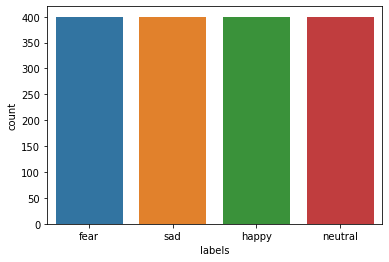

In [8]:
sns.countplot(df['labels'])

In [9]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize = (11,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar

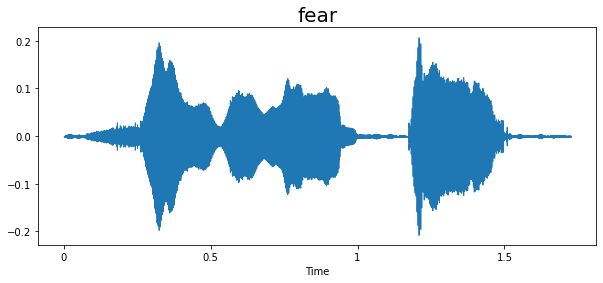

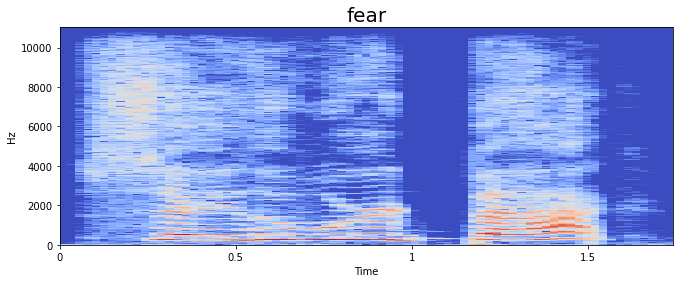

In [10]:
#Anxiety
emotion = 'fear'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

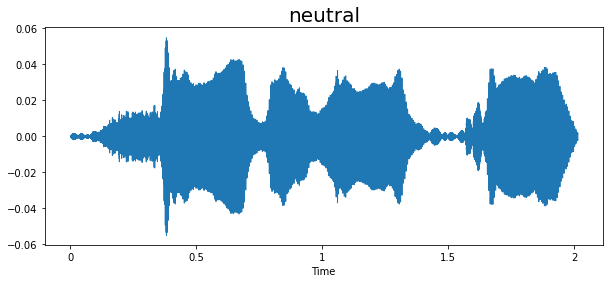

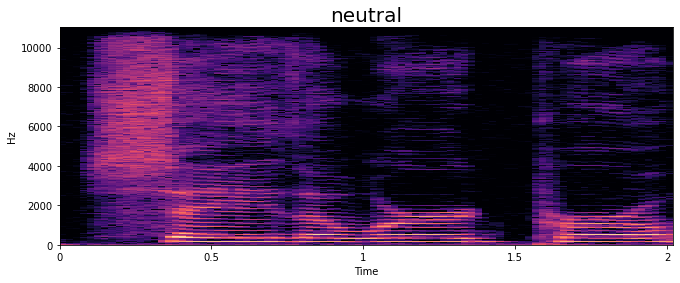

In [11]:
#Normal
emotion = 'neutral'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

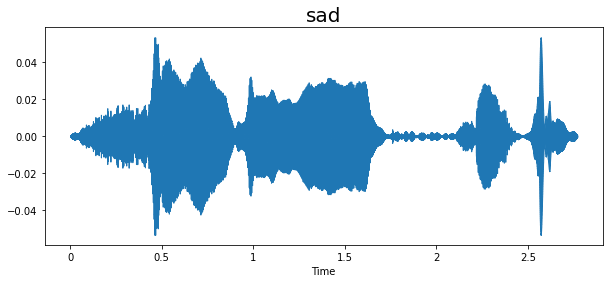

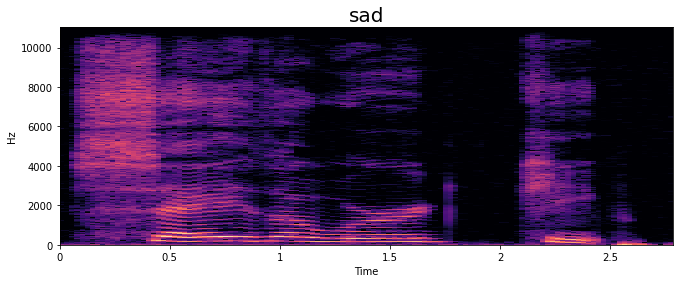

In [12]:
#depressed
emotion = 'sad'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

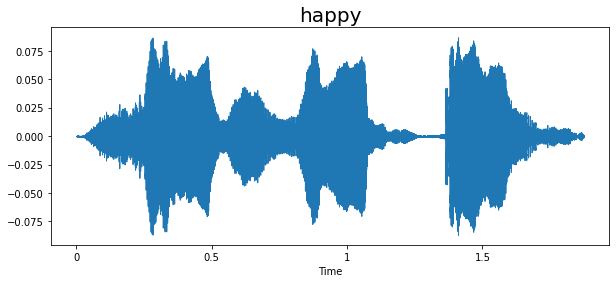

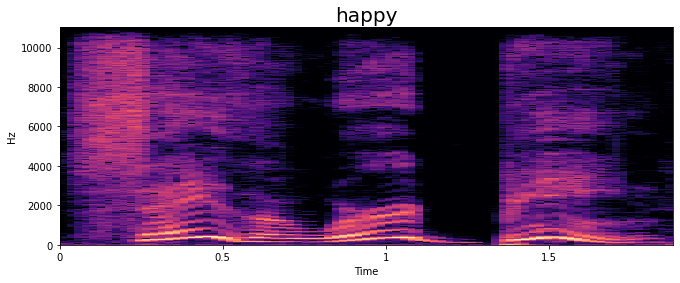

In [13]:
#happy
emotion = 'happy'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [15]:
extract_mfcc(df['speech'][0])

array([-4.4749503e+02,  9.1554199e+01, -3.9023107e-01, -1.7291504e+01,
        2.7826221e+00,  4.7178411e+00, -1.3548040e+01,  5.5741847e-01,
       -1.0805155e+01,  3.2483773e+00, -1.2746214e+01, -6.6335969e+00,
       -6.7705779e+00, -2.3902595e+00, -2.9169650e+00,  2.4589036e+00,
       -7.8448510e+00,  2.7039781e+00,  3.2153213e+00, -7.2382531e+00,
        5.6720991e+00,  1.8850632e+01,  1.4558587e+01,  2.9805136e+01,
        2.1194979e+01,  1.8110538e+01,  7.4543090e+00,  3.3440521e+00,
       -2.7450316e+00,  6.3023968e+00,  5.3630378e-02,  2.4252005e+00,
       -2.8612256e+00, -4.4852743e+00,  6.1673033e-01,  3.2275515e+00,
       -3.1178606e+00, -1.2512102e+00, -2.2621224e+00,  2.0872295e+00],
      dtype=float32)

In [16]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [17]:
X_mfcc

0       [-447.49503, 91.5542, -0.39023107, -17.291504,...
1       [-455.84607, 96.20423, 17.465084, -33.154514, ...
2       [-499.56274, 73.1605, 24.567032, 9.044855, 11....
3       [-500.67184, 90.57518, 24.92404, -9.049187, -7...
4       [-443.7494, 88.78329, 27.586239, -8.282469, -1...
                              ...                        
2795    [-399.47296, 84.63016, 39.60622, 25.378704, -1...
2796    [-417.12192, 89.38993, 27.670582, 39.845898, 7...
2797    [-366.33615, 106.1355, 24.270653, 31.438322, -...
2798    [-409.71164, 88.046425, 22.892744, 41.17281, 9...
2799    [-413.30853, 52.43607, 25.123642, 34.80452, 1....
Name: speech, Length: 1600, dtype: object

In [18]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1600, 40)

In [19]:
## input split
X = np.expand_dims(X, -1)
X.shape

(1600, 40, 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['labels']])

In [21]:
enc.get_feature_names()

array(['x0_fear', 'x0_happy', 'x0_neutral', 'x0_sad'], dtype=object)

In [22]:
y = y.toarray()


In [23]:
y.shape


(1600, 4)

# **LSTM model**


In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 71,648
Trainable params: 71,648
Non-traina

In [25]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=100, shuffle=True)

Epoch 1/100
13/13 [==============================] - 7s 68ms/step - loss: 1.1606 - accuracy: 0.6000 - val_loss: 0.8924 - val_accuracy: 0.6844
Epoch 2/100
13/13 [==============================] - 0s 21ms/step - loss: 0.4831 - accuracy: 0.8836 - val_loss: 0.5803 - val_accuracy: 0.7781
Epoch 3/100
13/13 [==============================] - 0s 20ms/step - loss: 0.1279 - accuracy: 0.9578 - val_loss: 0.3495 - val_accuracy: 0.8625
Epoch 4/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0557 - accuracy: 0.9828 - val_loss: 0.0466 - val_accuracy: 0.9875
Epoch 5/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0345 - accuracy: 0.9922 - val_loss: 0.0422 - val_accuracy: 0.9875
Epoch 6/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0298 - accuracy: 0.9922 - val_loss: 0.0736 - val_accuracy: 0.9781
Epoch 7/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0172 - accuracy: 0.9937 - val_loss: 0.0161 - val_accuracy: 0.9969
Epoch 

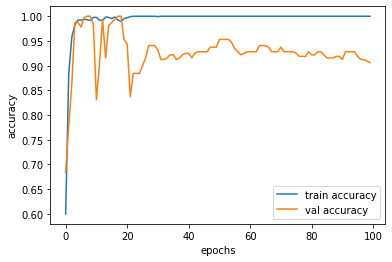

In [26]:
epochs = list(range(10))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot( acc, label='train accuracy')
plt.plot( val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

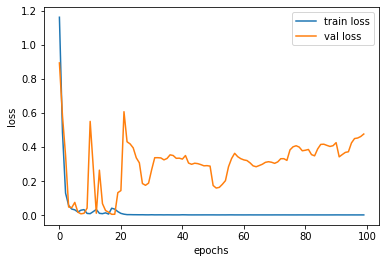

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot( loss, label='train loss')
plt.plot( val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
model.save("speech_model.h5")

In [29]:
filename = '/content/drive/MyDrive/Projects/Z-Hacks/speech emotion dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav'

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

X_mfcc = extract_mfcc(filename)
X = [[x for x in X_mfcc]]
X = np.array(X)
X.shape

(1, 40)

In [30]:
model.predict(X)

array([[1.0000000e+00, 1.8154125e-09, 1.9456271e-08, 2.4141755e-10]],
      dtype=float32)